# Visualizing Geospatial Data
inspired from scipy2018-geospatial

## goals of the tutorial
- plot a map with matplotlib
- choropleth map (pysal - mapclassify)
- folium

**based on the open data of:**
- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic 


### requirements
- python knowledge
- pandas

### status 
*"the map is not the territory"*

---

In [1]:
#note: this command is for the mybinder users :)
!conda install -y pysal

/bin/sh: 1: conda: not found


In [2]:
!conda install -y folium

/bin/sh: 1: conda: not found


In [3]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import pysal as pi
import requests, zipfile, io
from shapely.geometry import Point
pd.options.display.max_rows = 10

/home/napo/dev/geospatial_bigdive/env/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


## data setup
based on the previous tutorial

In [4]:
libraries = gpd.read_file('data'  + os.sep + 'italian_libraries.shp')
italian_regions = gpd.read_file('data' + os.sep + 'Reg01012019_WGS84.shp')
italian_regions = italian_regions.to_crs(epsg=3857)
libraries = libraries.to_crs(epsg=3857)
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


# GeoPandas visualization functionality

**Basic plot**


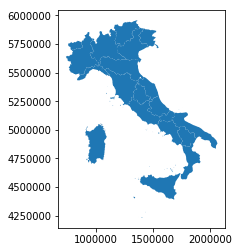

In [5]:
italian_regions.plot()

**Coloring based on column values** 

In [6]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

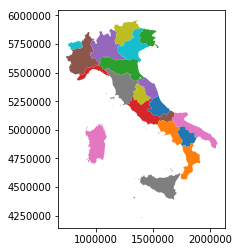

In [7]:
italian_regions.plot(column='DEN_REG')

**Adjusting the figure size**


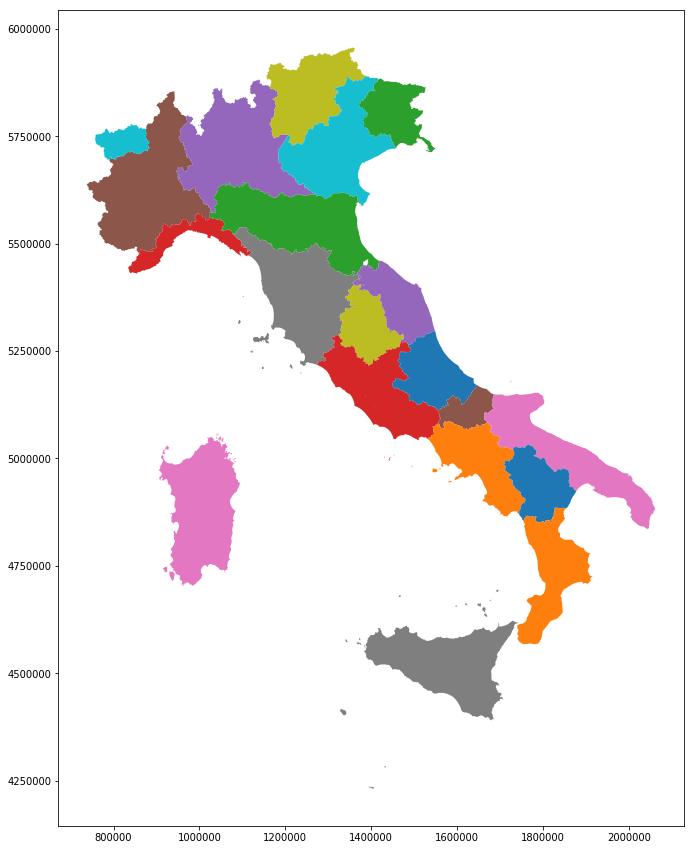

In [8]:
italian_regions.plot(column='DEN_REG',figsize=(15, 15))

**Adding a legend**

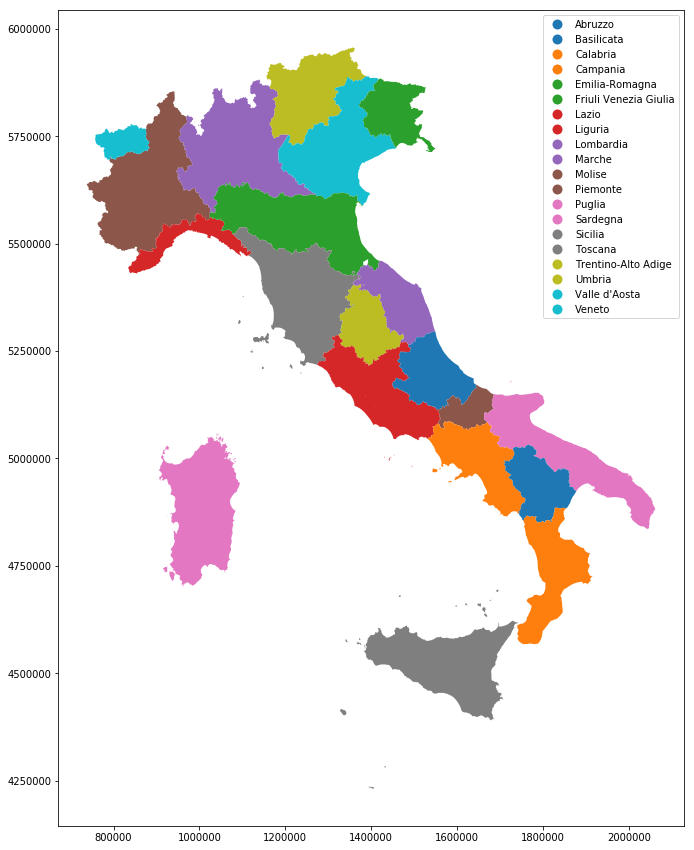

In [9]:
italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15))

**Removing the box / x and y coordinate label**

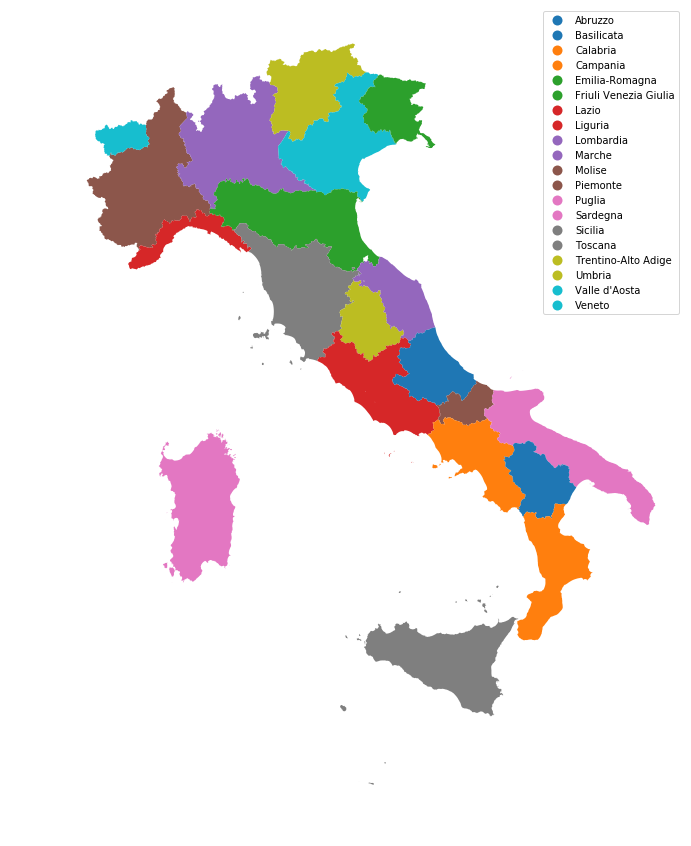

In [10]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15))
ax.set_axis_off()

**Change of the color scale**

the color scale can be chosen to make those offered by [maptplotlib](https://matplotlib.org/users/colormaps.html)

DEN_REG is a categorical variable that must highlight each region well without creating confusion, therefore it is suggested to [choose](https://matplotlib.org/users/colormaps.html#list-colormaps) a color scale from among those described as *divergent*

![](https://camo.githubusercontent.com/314c4f9be13d1fef2a6c30a03ee9135ac0e311d9/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f696d616765732f677261797363616c655f30315f30332e706e67)

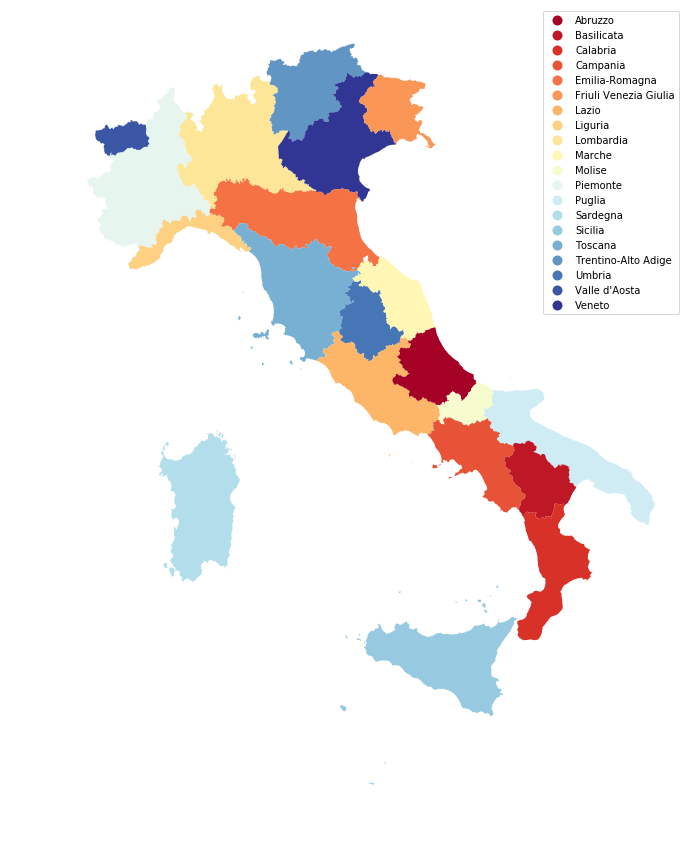

In [11]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15),cmap="RdYlBu")
ax.set_axis_off()

**highlight the edges**

Borders can be highlighted using the linewidth and edegecolor parameters

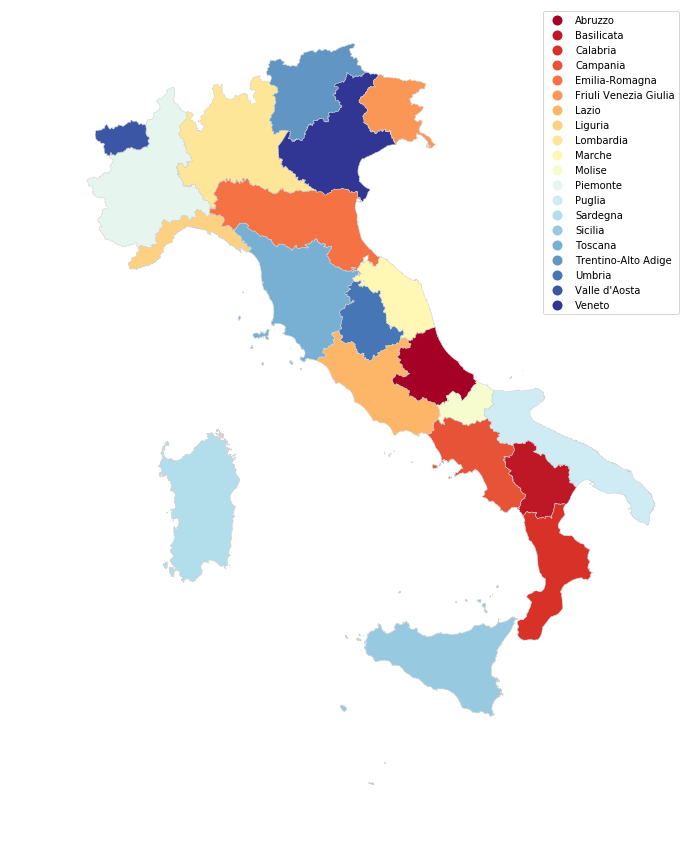

In [12]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15),cmap="RdYlBu", edgecolor = "lightgrey", linewidth = 0.5)
ax.set_axis_off()


**add labels to the map**

In [13]:
italian_regions.representative_point()

0      POINT (870867.5601905969 5664917.60474865)
1     POINT (820619.8124435988 5736864.147265466)
2     POINT (1077904.065492155 5726969.108332533)
3     POINT (1249127.895666767 5842585.083537841)
4     POINT (1346267.707443719 5739357.178227715)
                         ...                     
15    POINT (1871900.032444465 4994490.301153687)
16    POINT (1795446.427193109 4941868.031084491)
17    POINT (1851194.566902962 4727206.085883014)
18    POINT (1573754.106430499 4505855.265662744)
19    POINT (1013600.517729901 4876439.058439249)
Length: 20, dtype: object

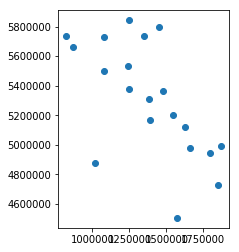

In [14]:
italian_regions.representative_point().plot()

In [15]:
representative_points = gpd.GeoDataFrame(italian_regions.representative_point()).reset_index()

In [16]:
representative_points

index                                            0
0       0   POINT (870867.5601905969 5664917.60474865)
1       1  POINT (820619.8124435988 5736864.147265466)
2       2  POINT (1077904.065492155 5726969.108332533)
3       3  POINT (1249127.895666767 5842585.083537841)
4       4  POINT (1346267.707443719 5739357.178227715)
..    ...                                          ...
15     15  POINT (1871900.032444465 4994490.301153687)
16     16  POINT (1795446.427193109 4941868.031084491)
17     17  POINT (1851194.566902962 4727206.085883014)
18     18  POINT (1573754.106430499 4505855.265662744)
19     19  POINT (1013600.517729901 4876439.058439249)

[20 rows x 2 columns]

In [17]:
representative_points = representative_points.rename(columns={0:'geometry'}).set_geometry('geometry')

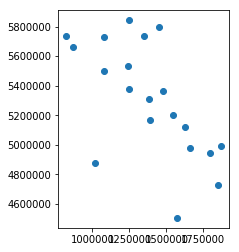

In [18]:
representative_points.plot()

In [19]:
labels = italian_regions.DEN_REG.to_frame().reset_index()

In [20]:
representative_points = representative_points.merge(labels,on="index")

In [21]:
representative_points = representative_points.rename(columns={'DEN_REG':'names'})

In [22]:
representative_points

index                                     geometry                names
0       0   POINT (870867.5601905969 5664917.60474865)             Piemonte
1       1  POINT (820619.8124435988 5736864.147265466)        Valle d'Aosta
2       2  POINT (1077904.065492155 5726969.108332533)            Lombardia
3       3  POINT (1249127.895666767 5842585.083537841)  Trentino-Alto Adige
4       4  POINT (1346267.707443719 5739357.178227715)               Veneto
..    ...                                          ...                  ...
15     15  POINT (1871900.032444465 4994490.301153687)               Puglia
16     16  POINT (1795446.427193109 4941868.031084491)           Basilicata
17     17  POINT (1851194.566902962 4727206.085883014)             Calabria
18     18  POINT (1573754.106430499 4505855.265662744)              Sicilia
19     19  POINT (1013600.517729901 4876439.058439249)             Sardegna

[20 rows x 3 columns]

In [23]:
import matplotlib.pyplot as plt

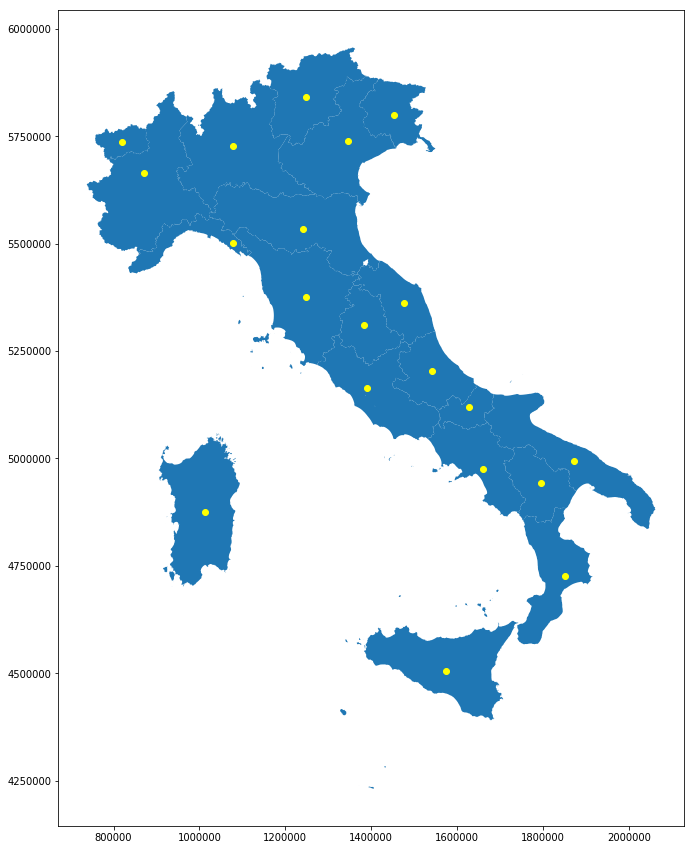

In [24]:
f, canvas = plt.subplots(1,figsize = (15, 15))
italian_regions.plot(ax=canvas,figsize=(15,15))
representative_points.plot(ax=canvas,color='yellow')
plt.show()

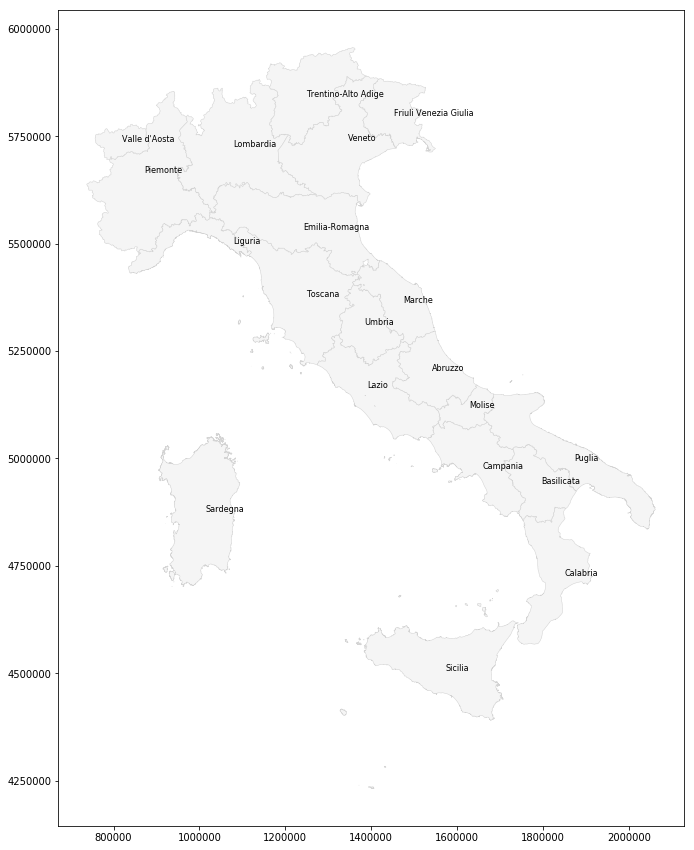

In [25]:
texts = []
canvas = italian_regions.plot(figsize = (15, 15), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

for x, y, label in zip(representative_points.geometry.x, representative_points.geometry.y, representative_points["names"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

# Chroloplet maps


... setup the data

In [26]:
total_people_regions=pd.read_csv('data' + os.sep +'italian_population_regions.csv')

In [27]:
total_people_regions.columns

Index(['Unnamed: 0', 'DEN_REG', 'Tipo di indicatore demografico', 'Value'], dtype='object')

In [28]:
total_people_regions.head(5)

Unnamed: 0              DEN_REG Tipo di indicatore demografico     Value
0           0             Piemonte      popolazione al 1º gennaio   4375865
1           1        Valle d'Aosta      popolazione al 1º gennaio    126202
2           2              Liguria      popolazione al 1º gennaio   1556981
3           3            Lombardia      popolazione al 1º gennaio  10036258
4           4  Trentino-Alto Adige      popolazione al 1º gennaio   1067648

In [29]:
total_people_regions.describe()

Unnamed: 0         Value
count    20.00000  2.000000e+01
mean      9.50000  3.024199e+06
std       5.91608  2.534702e+06
min       0.00000  1.262020e+05
25%       4.75000  1.178566e+06
50%       9.50000  1.802432e+06
75%      14.25000  4.565731e+06
max      19.00000  1.003626e+07

In [30]:
total_people_regions[total_people_regions.Value == total_people_regions.Value.min()][["DEN_REG","Value"]]

DEN_REG   Value
1  Valle d'Aosta  126202

In [31]:
total_people_regions[total_people_regions.Value == total_people_regions.Value.max()][["DEN_REG","Value"]]

DEN_REG     Value
3  Lombardia  10036258

### .. now we can start with the choropleth maps :)

In [32]:
geo_people_italian_regions = italian_regions.merge(total_people_regions,on="DEN_REG").reset_index()

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 6.68 µs


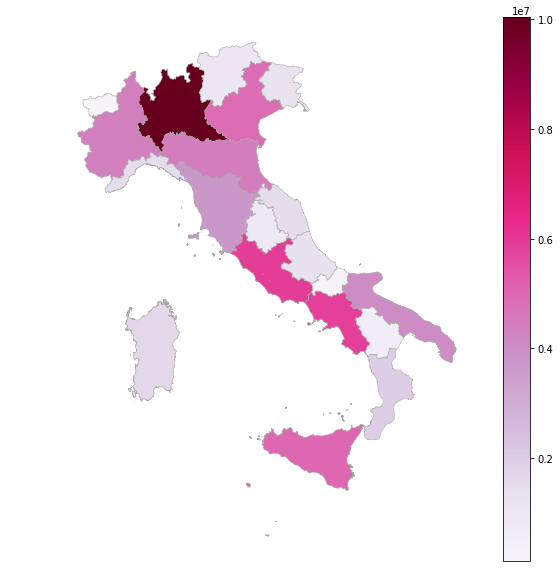

In [33]:
ax = geo_people_italian_regions.plot(column='Value',cmap="PuRd", legend=True,edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))
ax.set_axis_off()
%time


<div class="alert alert-info" style="font-size:120%">
<b>REFERENCE</b>

mapclassify - a module of PySal - offers different function to create choroloplet maps
<ul>
    <li>An overview of all methods provided by Mapclassify can be found here: <a href="https://mapclassify.readthedocs.io/en/latest/index.html">https://mapclassify.readthedocs.io/en/latest/index.html</a></li>
</ul>

In [34]:
quartilies=pi.viz.mapclassify.Equal_Interval(geo_people_italian_regions.Value,k=4)

In [35]:
quartilies

                   Equal Interval                   
 
   Lower                  Upper                Count
               x[i] <=  2603716.000               11
 2603716.000 < x[i] <=  5081230.000                6
 5081230.000 < x[i] <=  7558744.000                2
 7558744.000 < x[i] <= 10036258.000                1

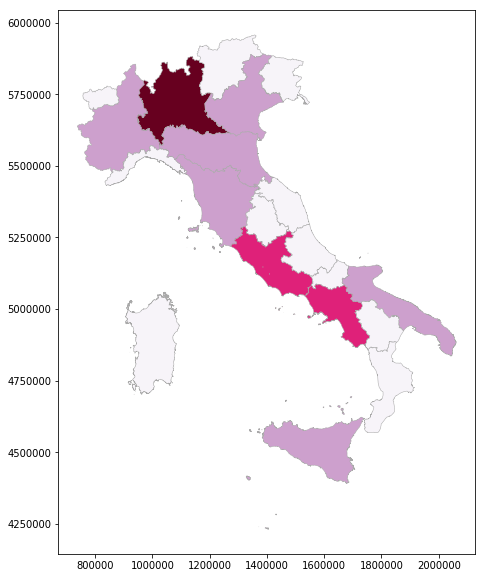

In [36]:
geo_people_italian_regions.assign(cl=quartilies.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [37]:
quantiles=pi.viz.mapclassify.Quantiles(geo_people_italian_regions.Value)

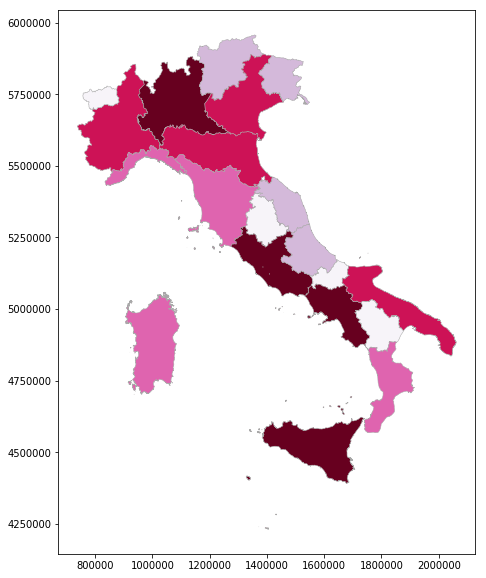

In [38]:
geo_people_italian_regions.assign(cl=quantiles.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [39]:
geo_people_italian_regions.columns

Index(['index', 'COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry', 'Unnamed: 0', 'Tipo di indicatore demografico', 'Value'],
      dtype='object')

In [40]:
percentile=pi.viz.mapclassify.Percentiles(geo_people_italian_regions.Value)

In [41]:
percentile.bins

array([  160837.29      ,   541255.5       ,  1802431.5       ,
        5833843.3       ,  9249740.64999999, 10036258.        ])

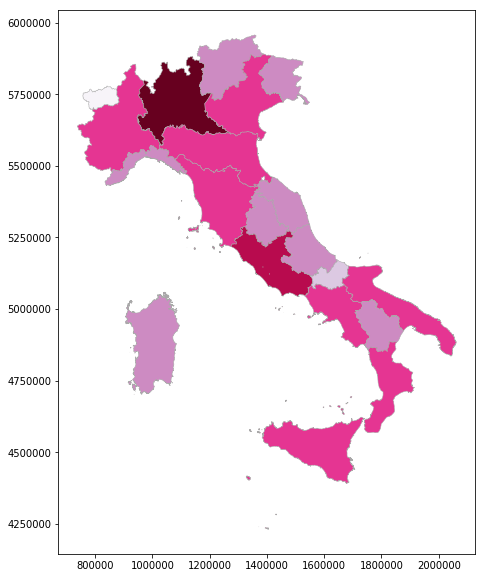

In [42]:
geo_people_italian_regions.assign(cl=percentile.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

<div class="alert alert-info" style="font-size:120%">
<b>Natural Breaks</b>
<p>
The Jenks optimization method, also called the Jenks natural breaks classification method, is a data clustering method designed to determine the best arrangement of values into different classes. 
</p><br/>
(source: <a href="https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization">https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization</a>)

In [43]:
natural_breaks=pi.viz.mapclassify.Natural_Breaks(geo_people_italian_regions.Value)

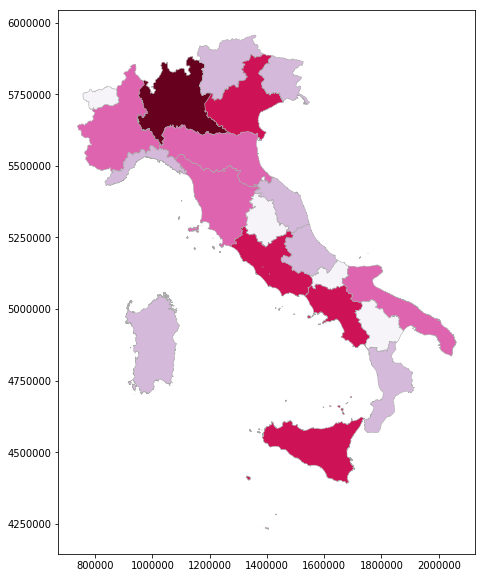

In [44]:
geo_people_italian_regions.assign(cl=natural_breaks.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [45]:
natural_breaks.bins

array([  884640.,  1956687.,  4452629.,  5896693., 10036258.])

In [46]:
fisher_jenks=pi.viz.mapclassify.Fisher_Jenks(geo_people_italian_regions.Value)

In [47]:
fisher_jenks.bins

array([  884640,  1956687,  4452629,  5896693, 10036258])

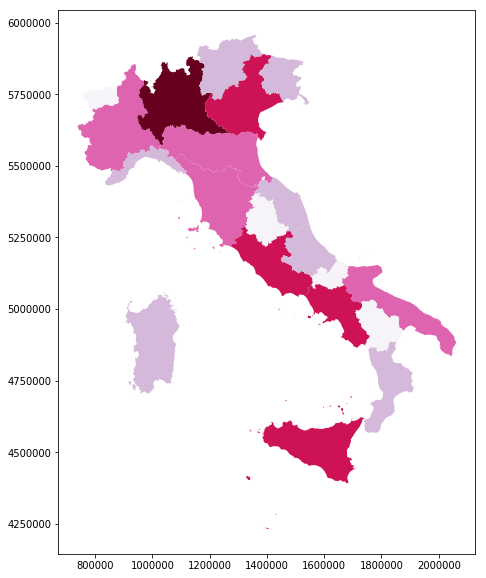

In [48]:
geo_people_italian_regions.plot(linewidth = 0.5, figsize=(10,10),column='Value', cmap='PuRd', scheme='fisher_jenks');

<div class="alert alert-info" style="font-size:120%">
<b>mapclassify</b>
<p>
The **scheme** option can be set to any scheme provided by **mapclassify** (e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’). Arguments can be passed in classification_kwds dict. See the <a href="https://mapclassify.readthedocs.io/en/latest/">mapclassify</a> documentation for further details about these map classification schemes.</p><br/>
    
<ul>
    <li>to abilitate this option you need to install mapclassify<br/>
        <code>conda install -c conda-forge mapclassify</code></li>
</ul>

# Heath Maps

In [49]:
from scipy import ndimage

In [50]:
libraries = gpd.read_file('data' + os.sep + 'italian_libraries.shp')

In [51]:
libraries_turin = libraries[libraries.comune=='Torino']

In [52]:
libraries_turin.crs

{'init': 'epsg:4326'}

In [53]:
libraries_turin3857 = libraries_turin.to_crs(epsg=3857)

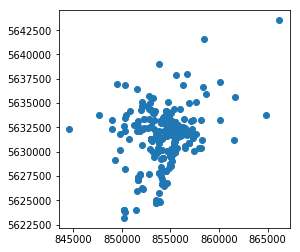

In [54]:
libraries_turin3857.plot()

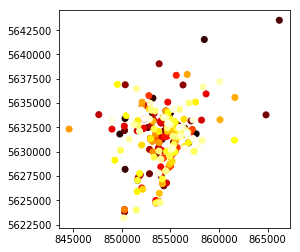

In [55]:
 libraries_turin3857.plot(cmap='hot');


In [56]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/home/napo/dev/geospatial_bigdive/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


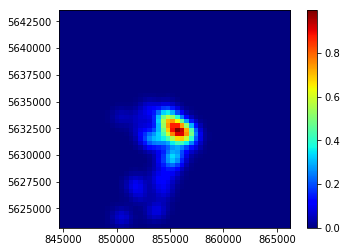

In [57]:
heatmap(libraries_turin3857, bins=50, smoothing=1.5)

# Folium

In [58]:
import folium

In [59]:
center_point_turin = libraries_turin.unary_union.envelope.centroid

In [60]:
map_turin = folium.Map([center_point_turin.y,center_point_turin.x], zoom_start=11, tiles="OpenStreetMap")
folium.GeoJson(libraries_turin.to_json()).add_to(map_turin)
map_turin

In [61]:
map_turin.save

<bound method Element.save of <folium.folium.Map object at 0x7ff805e0dc88>>

##  heatmap with folium

In [62]:
from folium.plugins import HeatMap

In [63]:
heat_data = [[row['geometry'].y,row['geometry'].x] for index, row in libraries_turin.iterrows()]

In [64]:
map_torino = folium.Map(location=[center_point_turin.y, center_point_turin.x],
                    zoom_start = 12) 

In [65]:
HeatMap(heat_data).add_to(map_torino)

In [66]:
map_torino